In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import numpy as np 
import tensorflow as tf

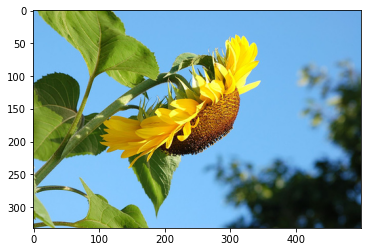

In [2]:
img=mpimg.imread('../input/flowers-recognition/flowers/sunflower/1240624822_4111dde542.jpg')
imgplot = plt.imshow(img)
plt.show()

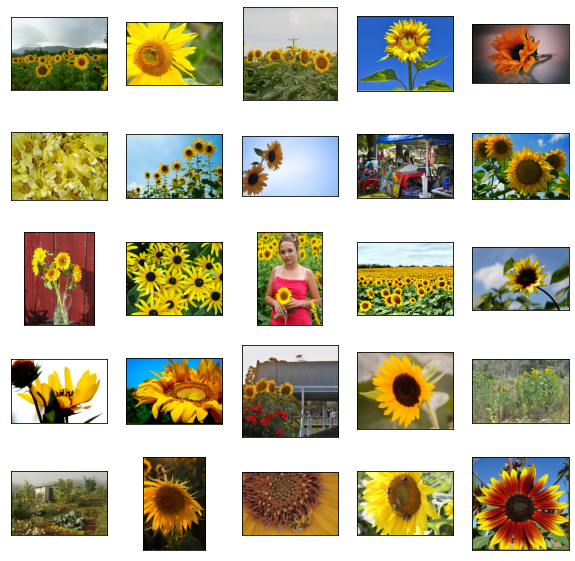

In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('../input/flowers-recognition/flowers/sunflower/*.jpg'):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
plt.show()

In [4]:
import os

In [5]:
# Directory with daisy pictures
daisy_dir = os.path.join('../input/flowers-recognition/flowers/daisy')

# Directory with dandelion pictures
dandelion_dir = os.path.join('../input/flowers-recognition/flowers/dandelion')

# Directory with rose pictures
rose_dir = os.path.join('../input/flowers-recognition/flowers/rose')

# Directory with sunflower pictures
sunflower_dir = os.path.join('../input/flowers-recognition/flowers/sunflower')

# Directory with tulip pictures
tulip_dir = os.path.join('../input/flowers-recognition/flowers/tulip')

In [6]:
train_daisy_names = os.listdir(daisy_dir)
print(train_daisy_names[:5])

train_rose_names = os.listdir(rose_dir)
print(train_rose_names[:5])

['5110110938_9da91455c4_m.jpg', '2513618768_ff7c004796_m.jpg', '9094631844_1a6abca29e.jpg', '3780380240_ef9ec1b737_m.jpg', '2641979584_2b21c3fe29_m.jpg']
['22325299158_6e32e599f8_m.jpg', '26723815164_d03d4d69cb_n.jpg', '4396642388_3081a38875_n.jpg', '14176042519_5792b37555.jpg', '14145188939_b4de638bd3_n.jpg']


In [7]:
print('total daisy images:', len(os.listdir(daisy_dir)))
print('total dandelion images:', len(os.listdir(dandelion_dir)))
print('total rose images:', len(os.listdir(rose_dir)))
print('total sunflower images:', len(os.listdir(sunflower_dir)))
print('total tulip images:', len(os.listdir(tulip_dir)))

total daisy images: 769
total dandelion images: 1055
total rose images: 784
total sunflower images: 734
total tulip images: 984


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some daisy pictures...



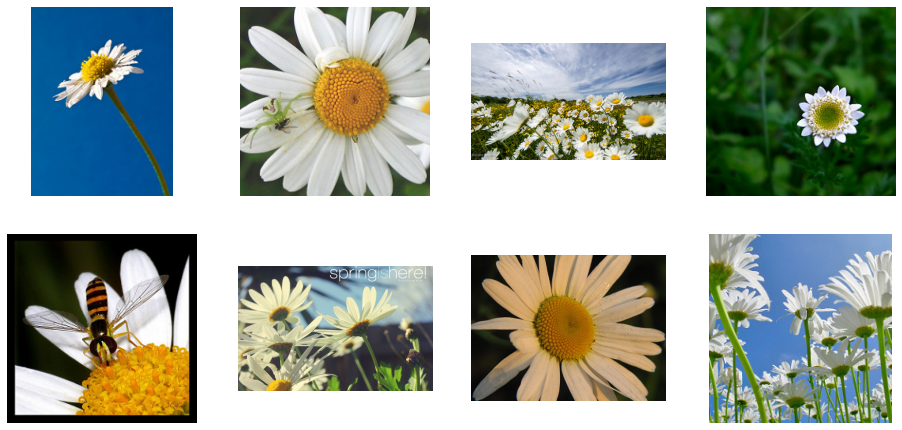

Showing some rose pictures...



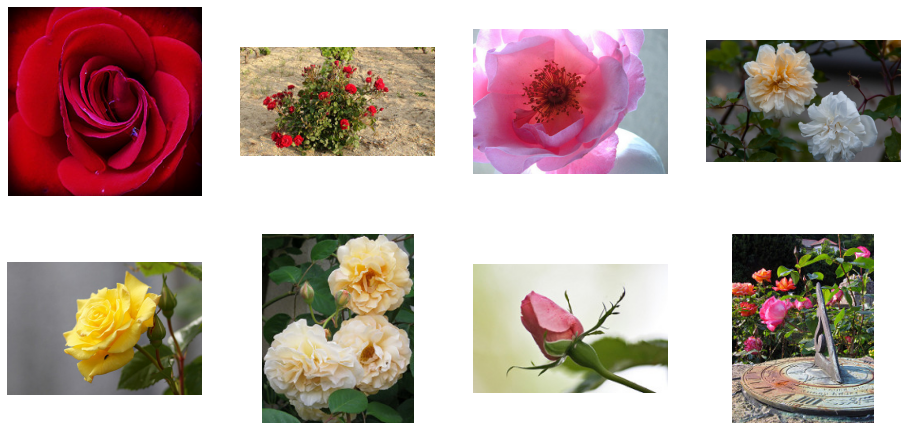

In [9]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_daisy_pix = [os.path.join(daisy_dir, fname) 
                for fname in train_daisy_names[pic_index-8:pic_index]]
next_rose_pix = [os.path.join(rose_dir, fname) 
                for fname in train_rose_names[pic_index-8:pic_index]]

print ("Showing some daisy pictures...")
print()
for i, img_path in enumerate(next_daisy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some rose pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_rose_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:

batch_size = 128

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../input/flowers-recognition/flowers',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['daisy','dandelion','rose','sunflower','tulip'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 4323 images belonging to 5 classes.


In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [16]:

total_sample=train_generator.n

In [17]:

n_epochs = 30

In [18]:

history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/30
33/33 [==============================] - 22s 671ms/step - loss: 1.5943 - acc: 0.2741
Epoch 2/30
33/33 [==============================] - 15s 448ms/step - loss: 1.4020 - acc: 0.3931
Epoch 3/30
33/33 [==============================] - 15s 464ms/step - loss: 1.1915 - acc: 0.5025
Epoch 4/30
33/33 [==============================] - 16s 473ms/step - loss: 1.1185 - acc: 0.5504
Epoch 5/30
33/33 [==============================] - 15s 463ms/step - loss: 1.0274 - acc: 0.5852
Epoch 6/30
33/33 [==============================] - 15s 448ms/step - loss: 0.9797 - acc: 0.6215
Epoch 7/30
33/33 [==============================] - 15s 462ms/step - loss: 0.9474 - acc: 0.6308
Epoch 8/30
33/33 [==============================] - 16s 472ms/step - loss: 0.9100 - acc: 0.6408
Epoch 9/30
33/33 [==============================] - 15s 458ms/step - loss: 0.8512 - acc: 0.6713
Epoch 10/30
33/33 [==============================] - 15s 448ms/step - loss: 0.8343 - acc: 0.6763
Epoch 11/30
33/33 [====================